波士顿数据集线性回归的梯度下降算法实现

In [10]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

读取数据集

In [4]:
X,y=load_boston(return_X_y=True)
tra_X=torch.tensor(X[0:380,:]).float()
tra_y=torch.tensor(y[0:380]).float()
tes_X=torch.tensor(X[380:,:]).float()
tes_y=torch.tensor(y[380:]).float()

定义网络结构

In [5]:
class Linear_regress(nn.Module):
    def __init__(self):
        super(Linear_regress,self).__init__()
        self.func=nn.Linear(13,1)
    def forward(self,x):
        return self.func(x)

损失函数

In [6]:
loss_fun=nn.MSELoss()

训练

train error: tensor(33.1312, grad_fn=<MseLossBackward>)


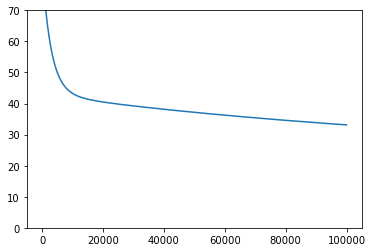

In [7]:
mod=Linear_regress()
step=0.000003
recorder=np.zeros(100000)
for i in range(0,100000):
    mod.zero_grad()
    pre=mod(tra_X)    
    loss=loss_fun(pre.squeeze(),tra_y)
    recorder[i]=loss
    loss.backward()
    for par in mod.parameters():
        par.data.add_(-step*par.grad.data)


plt.plot(recorder)
plt.ylim(0,70)
print('train error:',loss)

查看参数

In [8]:
for par in mod.parameters():
    print(par)

Parameter containing:
tensor([[-0.0261,  0.0817,  0.0559,  0.2496,  0.0108,  1.7138,  0.0683, -0.6325,
          0.3183, -0.0076, -0.1879,  0.0617, -0.8267]], requires_grad=True)
Parameter containing:
tensor([0.1059], requires_grad=True)


计算测试误差

In [9]:
tes_pre=mod(tes_X)
print('test error:',loss_fun(tes_pre.squeeze(),tes_y))

test error: tensor(89.5048, grad_fn=<MseLossBackward>)


test error比train error大很多，怀疑模型可能存在过拟合的问题。下一篇，我们将使用LASSO回归建立一个模型，只需要在原有loss的基础上加上惩罚项。